# Step 1: Read the two dataframes

In [1]:
import pandas as pd
import datetime as dt
import numpy

# Read the two DataFrames
dataset1 = pd.read_csv('price_demand_data.csv') # Read CSV file "price_demand_data.csv"
dataset2 = pd.read_csv('weather_data.csv') # Read CSV file "weather_data.csv"
display(dataset1)
display(dataset2)

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
0,VIC1,1/01/2021 0:30,4179.21,LOW
1,VIC1,1/01/2021 1:00,4047.76,LOW
2,VIC1,1/01/2021 1:30,3934.70,LOW
3,VIC1,1/01/2021 2:00,3766.45,LOW
4,VIC1,1/01/2021 2:30,3590.37,LOW
...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM


,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,...,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,...,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,...,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,...,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,27/08/2021,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,7.7,...,7,,Calm,1020.0,12.8,65,7.0,SSE,7,1017.4
239,28/08/2021,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,9.1,...,1,N,7,1018.6,17.4,31,3.0,NNW,24,1013.5
240,29/08/2021,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,10.6,...,7,N,13,1011.4,12.8,84,7.0,S,6,1010.4
241,30/08/2021,6.4,17.6,4.0,1.4,7.4,NNW,50.0,14:04,11.1,...,7,N,15,1016.1,16.8,45,1.0,NNW,28,1013.2


# Step 2: Merge (on Date column)

## Step 2i): dataset2 (Weather_data): Extracted date in a new column 'Date_key': dd/mm/yyy format

In [2]:
# Date extracted in a new column called 'Date_Key: dd/mm/yyyy' from dataset2: 'weather_data.csv'

#dataset2['Date_Key'] = dataset2['Date'].dt.datetime.strftime("%d/%m/%Y")
#dataset2.dtypes

date_time_2 = list(map(lambda x: dt.datetime.strptime(x,'%d/%m/%Y').strftime("%d/%m/%Y"), \
                       dataset2['Date']))
dataset2['Date_Key'] = date_time_2
display(dataset2.head())

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Date_Key
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,...,N,2,1018.8,28.1,43,5.0,E,13,1015.3,01/01/2021
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,...,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5,02/01/2021
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,...,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2,03/01/2021
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,...,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0,04/01/2021
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,...,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3,05/01/2021


## Step 2ii): dataset1 (price_demand_data): Extracted date out of timestamp column in a new column 'Date_key': dd/mm/yyy format

In [3]:
# Date extracted out of timestamp col in a new col 'Date_Key: dd/mm/yyyy format' 
# from dataset1: 'price_demand_data.csv'

date_time_1 = list(map(lambda x: dt.datetime.strptime(x,'%d/%m/%Y %H:%M').strftime("%d/%m/%Y"), \
                       dataset1['SETTLEMENTDATE']))
dataset1['Date_Key'] = date_time_1
display(dataset1.head())

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date_Key
0,VIC1,1/01/2021 0:30,4179.21,LOW,01/01/2021
1,VIC1,1/01/2021 1:00,4047.76,LOW,01/01/2021
2,VIC1,1/01/2021 1:30,3934.70,LOW,01/01/2021
3,VIC1,1/01/2021 2:00,3766.45,LOW,01/01/2021
4,VIC1,1/01/2021 2:30,3590.37,LOW,01/01/2021


## Maximum TOTALDEMAND per day

In [4]:
# Given: Demand for every half an hour period each day
# Extracted: Maximum demand per day in a new column TOTALDEMAND_MAX
# Why: Bcz we want to predict 'maximum' demand per day

dataset1 = dataset1.join(dataset1.groupby('Date_Key')['TOTALDEMAND'].max(), on='Date_Key', rsuffix='_MAX')
display(dataset1)

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date_Key,TOTALDEMAND_MAX
0,VIC1,1/01/2021 0:30,4179.21,LOW,01/01/2021,5019.64
1,VIC1,1/01/2021 1:00,4047.76,LOW,01/01/2021,5019.64
2,VIC1,1/01/2021 1:30,3934.70,LOW,01/01/2021,5019.64
3,VIC1,1/01/2021 2:00,3766.45,LOW,01/01/2021,5019.64
4,VIC1,1/01/2021 2:30,3590.37,LOW,01/01/2021,5019.64
...,...,...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,31/08/2021,5779.56
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,31/08/2021,5779.56
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,31/08/2021,5779.56
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM,31/08/2021,5779.56


## Converting Price: Categorical to Numerical

In [5]:
# Replace Price categories with numeric values: 1,2,3,4 corresponding to the categories
# and created a new column 'PRICE_NUMERIC'

dataset1['PRICE_NUMERIC'] = dataset1['PRICECATEGORY']
dataset1['PRICE_NUMERIC'] = dataset1['PRICE_NUMERIC'].replace(['LOW','MEDIUM','HIGH','EXTREME'],[1,2,3,4])
display(dataset1)
dataset1.dtypes # check the data types of dataset1

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date_Key,TOTALDEMAND_MAX,PRICE_NUMERIC
0,VIC1,1/01/2021 0:30,4179.21,LOW,01/01/2021,5019.64,1
1,VIC1,1/01/2021 1:00,4047.76,LOW,01/01/2021,5019.64,1
2,VIC1,1/01/2021 1:30,3934.70,LOW,01/01/2021,5019.64,1
3,VIC1,1/01/2021 2:00,3766.45,LOW,01/01/2021,5019.64,1
4,VIC1,1/01/2021 2:30,3590.37,LOW,01/01/2021,5019.64,1
...,...,...,...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,31/08/2021,5779.56,2
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,31/08/2021,5779.56,2
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,31/08/2021,5779.56,2
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM,31/08/2021,5779.56,2


REGION              object
SETTLEMENTDATE      object
TOTALDEMAND        float64
PRICECATEGORY       object
Date_Key            object
TOTALDEMAND_MAX    float64
PRICE_NUMERIC        int64
dtype: object

## Maximum price per day

In [6]:
# Maximum price value corresponding to each date in a new column PRICE_NUMERIC_MAX 
dataset1 = dataset1.join(dataset1.groupby('Date_Key')['PRICE_NUMERIC'].max(), on='Date_Key', rsuffix='_MAX') 
display(dataset1)

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date_Key,TOTALDEMAND_MAX,PRICE_NUMERIC,PRICE_NUMERIC_MAX
0,VIC1,1/01/2021 0:30,4179.21,LOW,01/01/2021,5019.64,1,1
1,VIC1,1/01/2021 1:00,4047.76,LOW,01/01/2021,5019.64,1,1
2,VIC1,1/01/2021 1:30,3934.70,LOW,01/01/2021,5019.64,1,1
3,VIC1,1/01/2021 2:00,3766.45,LOW,01/01/2021,5019.64,1,1
4,VIC1,1/01/2021 2:30,3590.37,LOW,01/01/2021,5019.64,1,1
...,...,...,...,...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,31/08/2021,5779.56,2,2
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,31/08/2021,5779.56,2,2
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,31/08/2021,5779.56,2,2
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM,31/08/2021,5779.56,2,2


## Dropped duplicates in Price_demand_data & created a new DF

In [7]:
# Dropped the duplicates in 'Price_demand_data' and created a new dataframe 'dataset_1' 
# with selected 4 columns: Region, Date, Maximum Demand, Maximum Price

dataset_1 = dataset1[['REGION', 'Date_Key', 'TOTALDEMAND_MAX', 'PRICE_NUMERIC_MAX']].drop_duplicates(subset=['Date_Key'])
display(dataset_1)

,REGION,Date_Key,TOTALDEMAND_MAX,PRICE_NUMERIC_MAX
0,VIC1,01/01/2021,5019.64,1
47,VIC1,02/01/2021,4964.35,1
95,VIC1,03/01/2021,4503.31,1
143,VIC1,04/01/2021,4764.18,1
191,VIC1,05/01/2021,4800.64,1
...,...,...,...,...
11471,VIC1,28/08/2021,5716.32,2
11519,VIC1,29/08/2021,6227.89,4
11567,VIC1,30/08/2021,6072.91,3
11615,VIC1,31/08/2021,5779.56,2


## Merged on Date: Data from 01/01/2021 - 31/08/2021

In [8]:
# merge 2 datasets: dataset_1 & dataset2 on 'Date_Key' using Inner join

dataset = pd.merge(dataset_1, dataset2, on = 'Date_Key')
dataset

,REGION,Date_Key,TOTALDEMAND_MAX,PRICE_NUMERIC_MAX,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,VIC1,01/01/2021,5019.64,1,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,VIC1,02/01/2021,4964.35,1,2/01/2021,18.4,29.0,0.0,9.4,1.3,...,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,VIC1,03/01/2021,4503.31,1,3/01/2021,17.0,26.2,12.6,4.8,7.1,...,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,VIC1,04/01/2021,4764.18,1,4/01/2021,16.0,18.6,2.6,3.8,0.0,...,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,VIC1,05/01/2021,4800.64,1,5/01/2021,15.9,19.1,11.2,1.0,0.0,...,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,VIC1,27/08/2021,6769.89,4,27/08/2021,4.6,13.6,0.0,1.2,3.8,...,7,,Calm,1020.0,12.8,65,7.0,SSE,7,1017.4
239,VIC1,28/08/2021,5716.32,2,28/08/2021,5.3,17.8,0.0,1.6,9.6,...,1,N,7,1018.6,17.4,31,3.0,NNW,24,1013.5
240,VIC1,29/08/2021,6227.89,4,29/08/2021,9.1,16.2,0.6,6.4,4.3,...,7,N,13,1011.4,12.8,84,7.0,S,6,1010.4
241,VIC1,30/08/2021,6072.91,3,30/08/2021,6.4,17.6,4.0,1.4,7.4,...,7,N,15,1016.1,16.8,45,1.0,NNW,28,1013.2


In [9]:
# Check data types of the new merged dataset

dataset.dtypes

REGION                                object
Date_Key                              object
TOTALDEMAND_MAX                      float64
PRICE_NUMERIC_MAX                      int64
Date                                  object
Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Evaporation (mm)                     float64
Sunshine (hours)                     float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)            float64
9am cloud amount (oktas)               int64
9am wind direction                    object
9am wind speed (km/h)                 object
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)              int64
3pm cloud amount (oktas)             float64
3pm wind d

In [10]:
# check if the columns in dataset is null?
# .isnull(): The isnull() method returns a DataFrame object where all the values are replaced 
# with a Boolean value True for NULL values, and otherwise False

dataset.isnull().sum()

REGION                               0
Date_Key                             0
TOTALDEMAND_MAX                      0
PRICE_NUMERIC_MAX                    0
Date                                 0
Minimum temperature (°C)             1
Maximum temperature (°C)             1
Rainfall (mm)                        2
Evaporation (mm)                     0
Sunshine (hours)                     0
Direction of maximum wind gust       3
Speed of maximum wind gust (km/h)    3
Time of maximum wind gust            3
9am Temperature (°C)                 1
9am relative humidity (%)            1
9am cloud amount (oktas)             0
9am wind direction                   1
9am wind speed (km/h)                1
9am MSL pressure (hPa)               2
3pm Temperature (°C)                 0
3pm relative humidity (%)            0
3pm cloud amount (oktas)             1
3pm wind direction                   0
3pm wind speed (km/h)                0
3pm MSL pressure (hPa)               1
dtype: int64

In [11]:
# Check if the columns in dataset have values missing?
# .isna(): Indicates whether values are missing (NaN in numeric arrays, None or NaN in object arrays,
# NaT in datetimelike)
dataset.isna().sum()

REGION                               0
Date_Key                             0
TOTALDEMAND_MAX                      0
PRICE_NUMERIC_MAX                    0
Date                                 0
Minimum temperature (°C)             1
Maximum temperature (°C)             1
Rainfall (mm)                        2
Evaporation (mm)                     0
Sunshine (hours)                     0
Direction of maximum wind gust       3
Speed of maximum wind gust (km/h)    3
Time of maximum wind gust            3
9am Temperature (°C)                 1
9am relative humidity (%)            1
9am cloud amount (oktas)             0
9am wind direction                   1
9am wind speed (km/h)                1
9am MSL pressure (hPa)               2
3pm Temperature (°C)                 0
3pm relative humidity (%)            0
3pm cloud amount (oktas)             1
3pm wind direction                   0
3pm wind speed (km/h)                0
3pm MSL pressure (hPa)               1
dtype: int64

In [12]:
# Replaced missing values in the given columns by the mean value of the said column

dataset['Minimum temperature (°C)'].replace([numpy.nan], dataset['Minimum temperature (°C)'].mean(), inplace=True)
dataset['Maximum temperature (°C)'].replace([numpy.nan], dataset['Maximum temperature (°C)'].mean(), inplace=True)
dataset['Rainfall (mm)'].replace([numpy.nan], dataset['Rainfall (mm)'].mean(), inplace=True)
dataset['Speed of maximum wind gust (km/h)'].replace([numpy.nan], dataset['Speed of maximum wind gust (km/h)'].mean(), inplace=True)
dataset['9am Temperature (°C)'].replace([numpy.nan], dataset['9am Temperature (°C)'].mean(), inplace=True)

In [13]:
# Check if there exist any missing values in the above columns.

print(dataset['Minimum temperature (°C)'].isna().sum())
print(dataset['Maximum temperature (°C)'].isna().sum())
print(dataset['Rainfall (mm)'].isna().sum())
print(dataset['Speed of maximum wind gust (km/h)'].isna().sum())
print(dataset['9am Temperature (°C)'].isna().sum())

0
0
0
0
0


# Pairwise pearson r correlation matrix between chosen features

In [14]:
# Pairwise pearson r correlation matrix between different variables
corr = dataset[['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)', 'Evaporation (mm)', 'Sunshine (hours)', 'Speed of maximum wind gust (km/h)', '9am Temperature (°C)', '3pm Temperature (°C)' ]].corr(method='pearson')
# corr = dataset[['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)', 'Evaporation (mm)', 'Sunshine (hours)', 'Speed of maximum wind gust (km/h)' ]].corr(method='pearson')
# corr = dataset[['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Evaporation (mm)', '9am Temperature (°C)', '3pm Temperature (°C)' ]].corr(method='pearson')
corr

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),3pm Temperature (°C)
Minimum temperature (°C),1.000000,0.707525,0.043400,0.655132,0.081809,0.055599,0.915726,0.661643
Maximum temperature (°C),0.707525,1.000000,-0.124821,0.620699,0.469055,-0.056155,0.820029,0.965134
Rainfall (mm),0.043400,-0.124821,1.000000,-0.044562,-0.146530,0.042003,-0.020988,-0.126890
Evaporation (mm),0.655132,0.620699,-0.044562,1.000000,0.273256,0.158109,0.705835,0.560214
Sunshine (hours),0.081809,0.469055,-0.146530,0.273256,1.000000,-0.058401,0.197050,0.487546
Speed of maximum wind gust (km/h),0.055599,-0.056155,0.042003,0.158109,-0.058401,1.000000,0.108981,-0.097803
9am Temperature (°C),0.915726,0.820029,-0.020988,0.705835,0.197050,0.108981,1.000000,0.761579
3pm Temperature (°C),0.661643,0.965134,-0.126890,0.560214,0.487546,-0.097803,0.761579,1.000000


# Plotting the heatmap of the above chosen features

In [15]:
corr.style.background_gradient(cmap ='coolwarm')

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),3pm Temperature (°C)
Minimum temperature (°C),1.000000,0.707525,0.043400,0.655132,0.081809,0.055599,0.915726,0.661643
Maximum temperature (°C),0.707525,1.000000,-0.124821,0.620699,0.469055,-0.056155,0.820029,0.965134
Rainfall (mm),0.043400,-0.124821,1.000000,-0.044562,-0.146530,0.042003,-0.020988,-0.126890
Evaporation (mm),0.655132,0.620699,-0.044562,1.000000,0.273256,0.158109,0.705835,0.560214
Sunshine (hours),0.081809,0.469055,-0.146530,0.273256,1.000000,-0.058401,0.197050,0.487546
Speed of maximum wind gust (km/h),0.055599,-0.056155,0.042003,0.158109,-0.058401,1.000000,0.108981,-0.097803
9am Temperature (°C),0.915726,0.820029,-0.020988,0.705835,0.197050,0.108981,1.000000,0.761579
3pm Temperature (°C),0.661643,0.965134,-0.126890,0.560214,0.487546,-0.097803,0.761579,1.000000


# 2nd model: Predicts Max Daily Price: CLASSIFICATION: KNN

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split # For splitting
from sklearn.metrics import accuracy_score # To check accuracy of the prediction
from sklearn import neighbors # To produce/generate KNeighborsClassifier
from sklearn import preprocessing # To scale/normalise the features

# Select features (input)
features = dataset[['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Evaporation (mm)', 'Sunshine (hours)','9am Temperature (°C)', '3pm Temperature (°C)' ]]

# What we want to predict (output)
classlabel = dataset['PRICE_NUMERIC_MAX']

# Splitting
features_train, features_test, class_train, class_test = train_test_split(features, classlabel, train_size = 0.8, random_state = 1)

# Scale/Normalize the features
scaler = preprocessing.StandardScaler().fit(features_train) 
features_train = scaler.transform(features_train) 
features_test = scaler.transform(features_test)

# Generating KNN classifier model & import neighbors from sklearn library
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)

# Creating model: Fitting features & classlabel in training data set
knn.fit(features_train, class_train)

# Produce predictions & check its .accuracy_score() on testing data set
predictions = knn.predict(features_test)
print(accuracy_score(class_test, predictions))


0.5510204081632653


## 2nd model: Predict max daily price: CLASSIFICATION: DECISION TREES

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split # For splitting
from sklearn.tree import DecisionTreeClassifier # For generating the model
from sklearn.metrics import accuracy_score # To check accuracy of the prediction
from sklearn import preprocessing

# Select features (input)
features = dataset[['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Evaporation (mm)', 'Sunshine (hours)','9am Temperature (°C)', '3pm Temperature (°C)']]

# What we want to predict (output)
classlabel = dataset['PRICE_NUMERIC_MAX']

# Splitting
features_train, features_test, class_train, class_test = train_test_split(features, classlabel, train_size = 0.8, random_state = 1)

# scaling/Normalizing the values
scaler = preprocessing.StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

#  Generating the decision tree model
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)

# Create tree = Fitting features and classlabel into the model
dt.fit(features_train, class_train)

# Check the accuracy_score of the prediction
predictions = dt.predict(features_test) # predictions based on testing set
print(accuracy_score(class_test, predictions)) # report how well these predictiosn based on acc_score

0.42857142857142855


## Visualising the Decision Tree classifier: Plot it

[Text(743.05546875, 1053.2250000000001, 'TOTALDEMAND_MAX <= -0.021\nentropy = 1.953\nsamples = 194\nvalue = [29, 61, 53, 51]'),
 Text(475.89843750000006, 985.2750000000001, 'Maximum temperature (°C) <= -1.179\nentropy = 1.525\nsamples = 100\nvalue = [1, 15, 39, 45]'),
 Text(386.53125000000006, 917.325, 'Sunshine (hours) <= -0.184\nentropy = 0.544\nsamples = 8\nvalue = [1, 0, 0, 7]'),
 Text(367.93125000000003, 849.375, 'entropy = 0.0\nsamples = 7\nvalue = [0, 0, 0, 7]'),
 Text(405.13125, 849.375, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]'),
 Text(565.265625, 917.325, 'Rainfall (mm) <= 1.064\nentropy = 1.478\nsamples = 92\nvalue = [0, 15, 39, 38]'),
 Text(442.33125, 849.375, 'Sunshine (hours) <= -0.045\nentropy = 1.408\nsamples = 84\nvalue = [0, 10, 37, 37]'),
 Text(308.0625, 781.425, 'Minimum temperature (°C) <= -0.635\nentropy = 1.398\nsamples = 77\nvalue = [0, 9, 37, 31]'),
 Text(160.425, 713.475, 'Maximum temperature (°C) <= -0.956\nentropy = 1.459\nsamples = 48\nvalue = [0, 

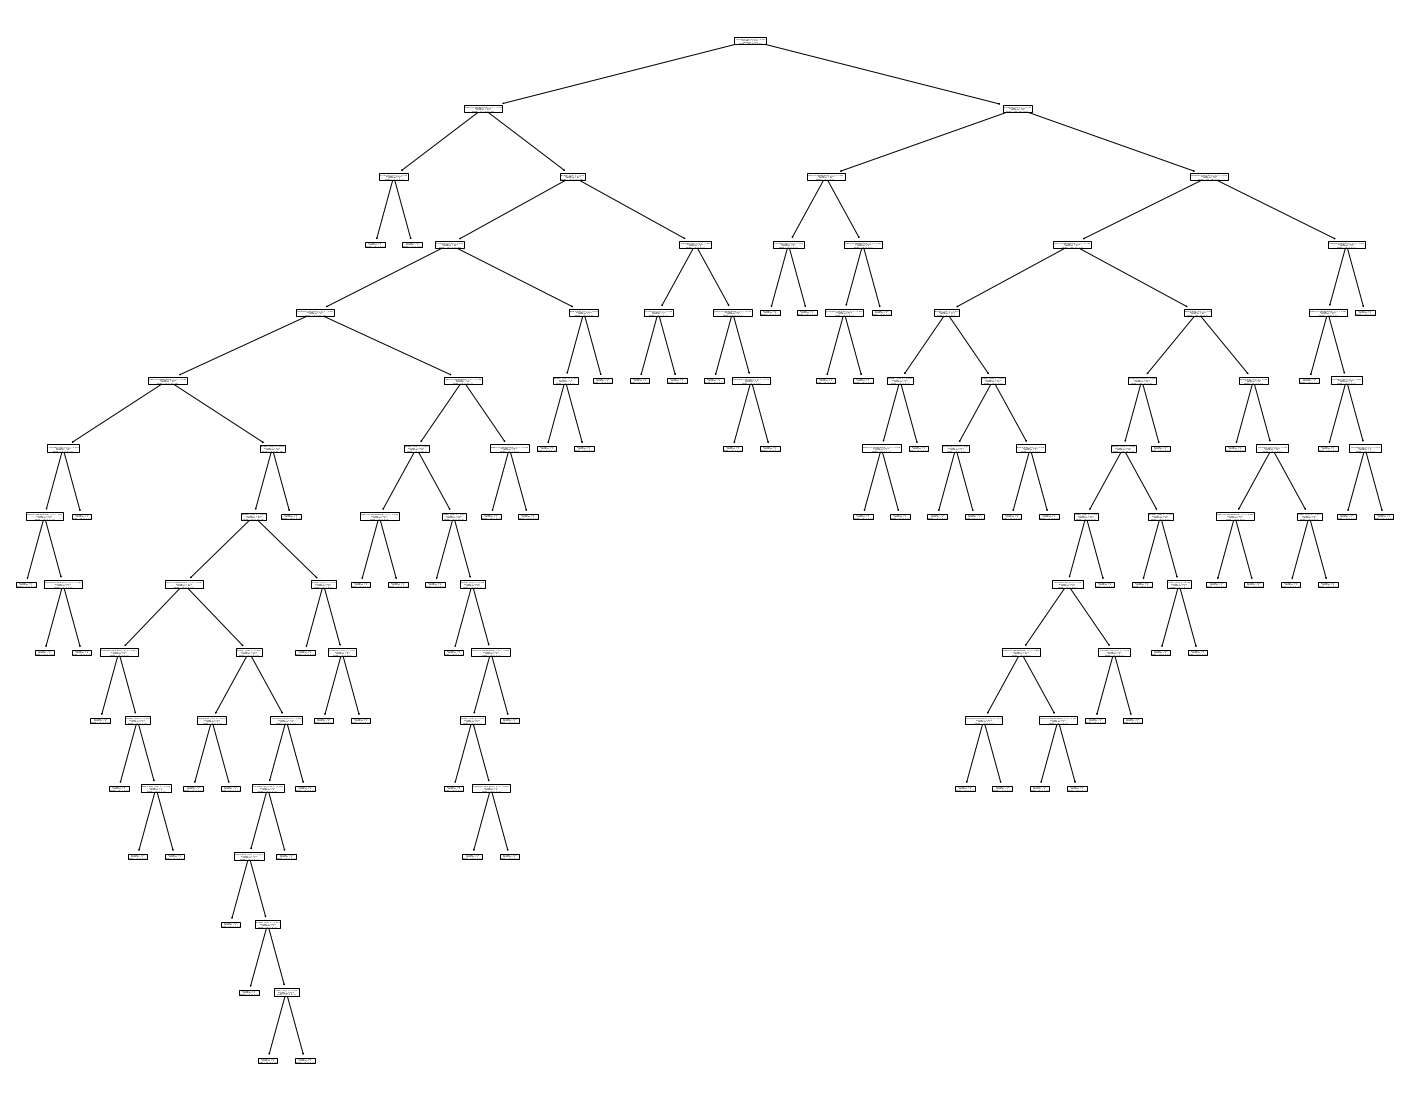

In [18]:
# To plot the decision tree just created.
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
featurenames = ['TOTALDEMAND_MAX', 'Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)', 'Evaporation (mm)', 'Sunshine (hours)', 'Speed of maximum wind gust (km/h)']
tree.plot_tree(dt, feature_names=featurenames)

# 1st model: Predict max daily demand: LINEAR REGRESSION MODEL

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import linear_model

# Choose the features (input)
X = dataset[['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Evaporation (mm)', '9am Temperature (°C)', '3pm Temperature (°C)']]

# What we have to predict (output)
Y = dataset['TOTALDEMAND_MAX']

# Splitting the data into training set and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 1)

# Generate the regression model (import .linear_model to use .LinearRegression() func)
lm = linear_model.LinearRegression()

# Create/ Produce the model: Fit training data into model
model = lm.fit(X_train, Y_train)
display(model)

# Predict coefficient & intercept from linear regression model(lm)
print(lm.coef_, lm.intercept_)

LinearRegression()

[-178.12242899  137.48627178   -6.37815828   66.78398688 -136.1167378 ] 7063.404626267072


## Access how regression model is doing

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
r2_test = lm.score(X_test, Y_test) #on testing data
print(r2_test)

0.22751276682266874


## How close these predictions are?

In [28]:
print(lm.predict(X_test.head())) # Predict values what we might think max demand should be
print(Y_test.head()) # What we actually had based on the Y values

[5782.38009438 6091.45776155 6634.1457726  5983.52819443 6310.42933119]
67     5527.62
242    5779.56
205    6817.65
122    6183.00
89     5769.10
Name: TOTALDEMAND_MAX, dtype: float64
